# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [27]:
from ift6758.data import get_player_stats
import sys

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [28]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [29]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,25,STL,47,44,26,15,3,101,...,2583,26,.591,6,94,6.28,0,0,0,0
1,2,Frederik Andersen,26,ANA,43,37,22,9,7,88,...,2298,24,.649,5,95,4.46,0,1,1,2
2,3,Craig Anderson,34,OTT,60,60,31,23,5,161,...,3477,31,.517,8,99,2.05,0,2,2,0
3,4,Richard Bachman,28,VAN,1,1,1,0,0,3,...,60,0,.000,0,NaN,NaN,0,0,0,0
4,5,Niklas Bäckström,37,CGY,4,3,2,2,0,13,...,233,2,.667,1,NaN,NaN,0,0,0,0


## Q1 - Intento

In [30]:
sys.path.append('../ift6758/data/')
from get_data import get_games_data

In [83]:
data_2019 = get_games_data(2019, 2020, './json')

Status code: 404 at gameID:2020020869, not found
Status code: 404 at gameID:2020020870, not found
Status code: 404 at gameID:2020020871, not found
Status code: 404 at gameID:2020020872, not found
Status code: 404 at gameID:2020020873, not found
Status code: 404 at gameID:2020020874, not found
Status code: 404 at gameID:2020020875, not found
Status code: 404 at gameID:2020020876, not found
Status code: 404 at gameID:2020020877, not found
Status code: 404 at gameID:2020020878, not found
Status code: 404 at gameID:2020020879, not found
Status code: 404 at gameID:2020020880, not found
Status code: 404 at gameID:2020020881, not found
Status code: 404 at gameID:2020020882, not found
Status code: 404 at gameID:2020020883, not found
Status code: 404 at gameID:2020020884, not found
Status code: 404 at gameID:2020020885, not found
Status code: 404 at gameID:2020020886, not found
Status code: 404 at gameID:2020020887, not found
Status code: 404 at gameID:2020020888, not found
Status code: 404 at 

In [84]:
from tidy_data import tidy
tiidy_data = tidy(data_2019)

In [85]:
tiidy_data.head()

,event_idx,period_time,period,game_id,team_away_name,team_home_name,is_goal,coordinate_x,coordinate_y,shot_type,strength,shooter_name,goalie_name,empty_net,team_name
0,4,00:25,1,2019020001,Ottawa Senators,Toronto Maple Leafs,True,85.0,-1.0,Tip-In,EVEN,Brady Tkachuk,Brady Tkachuk,False,Ottawa Senators
1,12,01:31,1,2019020001,Ottawa Senators,Toronto Maple Leafs,False,-32.0,-2.0,Snap Shot,nan,Morgan Rielly,Morgan Rielly,False,Toronto Maple Leafs
2,19,03:23,1,2019020001,Ottawa Senators,Toronto Maple Leafs,False,63.0,-6.0,Snap Shot,nan,Dylan DeMelo,Dylan DeMelo,False,Ottawa Senators
3,22,03:56,1,2019020001,Ottawa Senators,Toronto Maple Leafs,False,-59.0,-20.0,Wrist Shot,nan,Morgan Rielly,Morgan Rielly,False,Toronto Maple Leafs
4,27,04:47,1,2019020001,Ottawa Senators,Toronto Maple Leafs,False,-42.0,-29.0,Slap Shot,nan,Tyson Barrie,Tyson Barrie,False,Toronto Maple Leafs


In [86]:
tiidy_data.to_csv("tidy_data_2019.csv")

In [31]:
data = get_games_data(2017, 2018, './json')

Status code: 404 at gameID:2017030118, not found
Status code: 404 at gameID:2017030119, not found
Status code: 404 at gameID:2017030120, not found
Status code: 404 at gameID:2017030128, not found
Status code: 404 at gameID:2017030129, not found
Status code: 404 at gameID:2017030130, not found
Status code: 404 at gameID:2017030138, not found
Status code: 404 at gameID:2017030139, not found
Status code: 404 at gameID:2017030140, not found
Status code: 404 at gameID:2017030148, not found
Status code: 404 at gameID:2017030149, not found
Status code: 404 at gameID:2017030150, not found
Status code: 404 at gameID:2017030158, not found
Status code: 404 at gameID:2017030159, not found
Status code: 404 at gameID:2017030160, not found
Status code: 404 at gameID:2017030168, not found
Status code: 404 at gameID:2017030169, not found
Status code: 404 at gameID:2017030170, not found
Status code: 404 at gameID:2017030178, not found
Status code: 404 at gameID:2017030179, not found
Status code: 404 at 

In [34]:
from tidy_data import tidy
tiidy_data_2017 = tidy(data)

In [37]:
tiidy_data_2017.head()

,event_idx,period_time,period,game_id,team_away_name,team_home_name,is_goal,coordinate_x,coordinate_y,shot_type,strength,shooter_name,goalie_name,empty_net,team_name
0,5,00:38,1,2017020001,Toronto Maple Leafs,Winnipeg Jets,False,-36.0,-28.0,Wrist Shot,nan,Josh Morrissey,Josh Morrissey,False,Winnipeg Jets
1,7,00:49,1,2017020001,Toronto Maple Leafs,Winnipeg Jets,False,-75.0,1.0,Wrist Shot,nan,Shawn Matthias,Shawn Matthias,False,Winnipeg Jets
2,11,01:03,1,2017020001,Toronto Maple Leafs,Winnipeg Jets,False,-73.0,10.0,Backhand,nan,Bryan Little,Bryan Little,False,Winnipeg Jets
3,16,01:46,1,2017020001,Toronto Maple Leafs,Winnipeg Jets,False,80.0,-3.0,Wrist Shot,nan,Eric Fehr,Eric Fehr,False,Toronto Maple Leafs
4,24,03:42,1,2017020001,Toronto Maple Leafs,Winnipeg Jets,False,-44.0,-21.0,Snap Shot,nan,Patrik Laine,Patrik Laine,False,Winnipeg Jets


In [39]:
tiidy_data_2017.to_csv("tidy_data_2017.csv")

Game IDs

The first 4 digits identify the season of the game (ie. 2017 for the 2017-2018 season). The next 2 digits give the type of game, where 01 = preseason, 02 = regular season, 03 = playoffs, 04 = all-star. The final 4 digits identify the specific game number. For regular season and preseason games, this ranges from 0001 to the number of games played. (1271 for seasons with 31 teams (2017 and onwards) and 1230 for seasons with 30 teams). For playoff games, the 2nd digit of the specific number gives the round of the playoffs, the 3rd digit specifies the matchup, and the 4th digit specifies the game (out of 7).

# Question 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./tidy_data_2019.csv")

In [3]:
#data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Unnamed: 0,event_idx,period_time,period,game_id,team_away_name,team_home_name,is_goal,coordinate_x,coordinate_y,shot_type,strength,shooter_name,goalie_name,empty_net,team_name
0,0,4,00:25,1,2019020001,Ottawa Senators,Toronto Maple Leafs,True,85.0,-1.0,Tip-In,EVEN,Brady Tkachuk,Brady Tkachuk,False,Ottawa Senators
1,1,12,01:31,1,2019020001,Ottawa Senators,Toronto Maple Leafs,False,-32.0,-2.0,Snap Shot,NaN,Morgan Rielly,Morgan Rielly,False,Toronto Maple Leafs
2,2,19,03:23,1,2019020001,Ottawa Senators,Toronto Maple Leafs,False,63.0,-6.0,Snap Shot,NaN,Dylan DeMelo,Dylan DeMelo,False,Ottawa Senators
3,3,22,03:56,1,2019020001,Ottawa Senators,Toronto Maple Leafs,False,-59.0,-20.0,Wrist Shot,NaN,Morgan Rielly,Morgan Rielly,False,Toronto Maple Leafs
4,4,27,04:47,1,2019020001,Ottawa Senators,Toronto Maple Leafs,False,-42.0,-29.0,Slap Shot,NaN,Tyson Barrie,Tyson Barrie,False,Toronto Maple Leafs


In [4]:
data_2019 = data.loc[data['game_id'] < 2020000000]
data_2019.tail()


,Unnamed: 0,event_idx,period_time,period,game_id,team_away_name,team_home_name,is_goal,coordinate_x,coordinate_y,shot_type,strength,shooter_name,goalie_name,empty_net,team_name
126270,126270,319,16:01,3,2019030416,Tampa Bay Lightning,Dallas Stars,False,-59.0,-24.0,Snap Shot,NaN,Anthony Cirelli,Anthony Cirelli,False,Tampa Bay Lightning
126271,126271,326,17:20,3,2019030416,Tampa Bay Lightning,Dallas Stars,False,-81.0,3.0,Wrist Shot,NaN,Blake Coleman,Blake Coleman,False,Tampa Bay Lightning
126272,126272,333,18:50,3,2019030416,Tampa Bay Lightning,Dallas Stars,False,34.0,-6.0,Snap Shot,NaN,John Klingberg,John Klingberg,False,Dallas Stars
126273,126273,341,19:27,3,2019030416,Tampa Bay Lightning,Dallas Stars,False,31.0,10.0,Wrist Shot,NaN,John Klingberg,John Klingberg,False,Dallas Stars
126274,126274,343,19:45,3,2019030416,Tampa Bay Lightning,Dallas Stars,False,77.0,0.0,Wrist Shot,NaN,Joe Pavelski,Joe Pavelski,False,Dallas Stars


#### 5.1

In [5]:
shot_type_2019 = data.groupby(['shot_type'])['shot_type'].size().to_frame('count')#['event_idx'].count()
shot_type_2019 = shot_type_2019.reset_index()
shot_type_2019

,shot_type,count
0,Backhand,10409
1,Deflected,2619
2,Slap Shot,18714
3,Snap Shot,17677
4,Tip-In,6753
5,Wrap-around,1230
6,Wrist Shot,74184


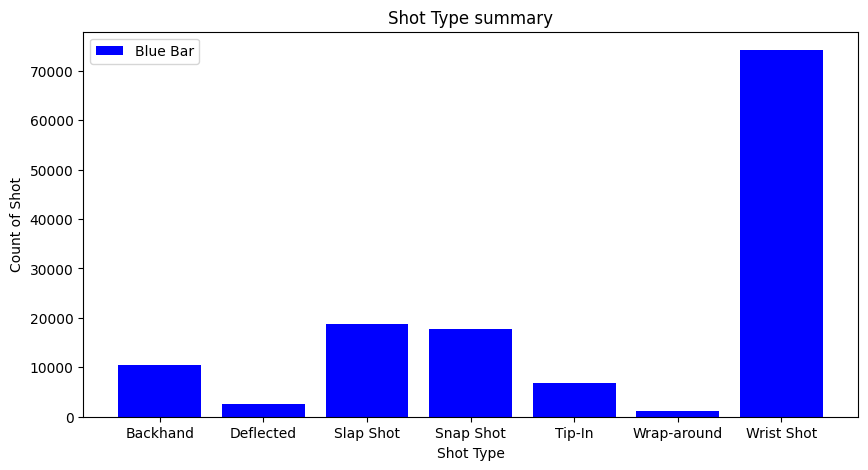

In [176]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(shot_type_2019['shot_type'],shot_type_2019['count'], label="Blue Bar", color='b')
plt.xlabel("Shot Type")
plt.ylabel("Count of Shot")
plt.title("Shot Type summary")
plt.legend()
plt.show()

In [6]:
df_2019 = data.groupby(['shot_type'])['is_goal'].value_counts().reset_index(name='count')
#shot_goal_2019 = shot_goal_2019.reset_index('count')
df_2019

,shot_type,is_goal,count
0,Backhand,False,9156
1,Backhand,True,1253
2,Deflected,False,2215
3,Deflected,True,404
4,Slap Shot,False,17421
5,Slap Shot,True,1293
6,Snap Shot,False,15807
7,Snap Shot,True,1870
8,Tip-In,False,5590
9,Tip-In,True,1163


In [7]:
df_true = df_2019[df_2019['is_goal']]
df_false = df_2019[df_2019['is_goal']==False]
print(df_true)
print(df_false)


      shot_type  is_goal  count
1      Backhand     True   1253
3     Deflected     True    404
5     Slap Shot     True   1293
7     Snap Shot     True   1870
9        Tip-In     True   1163
11  Wrap-around     True     85
13   Wrist Shot     True   6678
      shot_type  is_goal  count
0      Backhand    False   9156
2     Deflected    False   2215
4     Slap Shot    False  17421
6     Snap Shot    False  15807
8        Tip-In    False   5590
10  Wrap-around    False   1145
12   Wrist Shot    False  67506


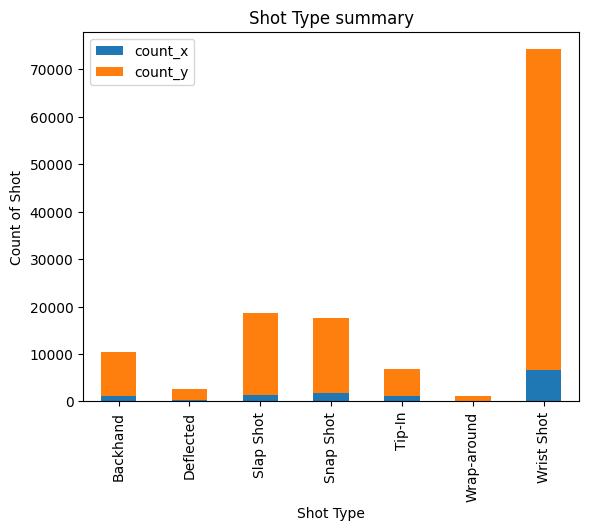

In [26]:
merge_df = pd.merge(df_true, df_false, on='shot_type')
merge_df.plot(x="shot_type", kind="bar", stacked=True)
plt.xlabel("Shot Type")
plt.ylabel("Count of Shot")
plt.title("Shot Type summary")
plt.legend()
plt.show()


In [33]:
# # Find the players goal score percentage
# player_goal_pct = len(player_data['Goal']['x'])/player_total_shots



#### 5.2

In [63]:
d = pd.read_csv("tidy_data_2017.csv")

,Unnamed: 0,event_idx,period_time,period,game_id,team_away_name,team_home_name,is_goal,coordinate_x,coordinate_y,shot_type,strength,shooter_name,goalie_name,empty_net,team_name
